# Linear Programming

## Overview

**Linear programming** problems either maximize or minimize 
a linear objective function subject to a set of  linear equality and/or inequality constraints.

Linear programs come in pairs:

* an original  **primal** problem, and

* an associated **dual** problem.
 
If a primal problem involves **maximization**, the dual problem involves **minimization**.

If a primal problem involves  **minimization**, the dual problem involves **maximization**.

We provide a standard form of a linear program and methods to transform other forms of linear programming problems  into a standard form.

We tell how to solve a linear programming problem using [SciPy](https://scipy.org/).

We describe the important concept of complementary slackness and how it relates to the dual problem.

Let's start with some standard imports.

In [1]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

## Objective Function and Constraints

We want to minimize a **cost function** $c'x = \sum_{i=1}^n c_i x_i$ over  feasible values of $x = (x_1,x_2,\dots,x_n)'$.

Here 

*  $c = (c_1,c_2,\dots,c_n)'$ is  a **unit cost vector**,  and 

*  $x = (x_1,x_2,\dots,x_n)'$ is a vector of **decision variables**

Decision variables are  restricted to satisfy a set of linear equality and/or inequality constraints.

We describe the constraints with the following  collections of  $n$-dimensional vectors $a_i$ and scalars $b_i$  and associated sets indexing the equality and inequality constraints:

* $a_i$ for $i \in M_i$, where $M_1,M_2,M_3$ are each  sets of indexes 
 
and a collection of  scalers 

* $b_i$ for $i \in N_i$, where $N_1,N_2,N_3$  are each sets of indexes.

A linear programming can be stated as {cite}`bertsimas_tsitsiklis1997`:

$$
\begin{aligned}
\min_{x} \ & c' x \\
\mbox{subject to } \ & a_i' x \ge b_i, & i \in M_1 \\
& a_i' x \le b_i, & i \in M_2  \\
& a_i' x = b_i, & i \in M_3  \\
& x_j \ge 0, & j \in N_1 \\
& x_j \le 0, & j \in N_2 \\
& x_j\ \text{unrestricted}, & j \in N_3 \\
\end{aligned}
$$ (linprog)

A vector $x$ that satisfies all of the constraints is called a **feasible solution**.

A collection of all feasible solutions is called  a **feasible set**. 

A feasible solution $x$ that minimizes the cost function  is called an **optimal solution**.

The corresponding value of cost function $c'x$ is called the  **optimal value**. 

If the feasible set is empty, we say that solving  the  linear programming problem is **infeasible**. 

If, for any $K \in \mathbb R$, there exists a feasible solution $x$ such that $c'x < K$, we say that the problem is **unbounded** or equivalently that the optimal value is $-\infty$.

## Example 1: Production Problem 

This example was created by {cite}`bertsimas_tsitsiklis1997`

Suppose that a factory can produce two goods called Product $1$ and Product $2$. 

To produce each product requires both material and labor.

Selling each product generates revenue.

Required per unit material and labor  inputs and  revenues  are shown in table below:

|          | Product 1 | Product 2 |
| :------: | :-------: | :-------: |
| Material |     2     |     5     |
|  Labor   |     4     |     2     |
| Revenue  |     3     |     4     |

30 units of material and 20 units of labor available.

A firm's problem is to construct a  production plan that uses its  30 units of materials and 20 unites of labor
to maximize its revenue.

Let $x_i$ denote the quantity of Product $i$ that the firm produces. 

This problem can be formulated as:

$$
\begin{aligned}
\max_{x_1,x_2} \ & z = 3 x_1 + 4 x_2 \\
\mbox{subject to } \ & 2 x_1 + 5 x_2 \le 30 \\
& 4 x_1 + 2 x_2 \le 20 \\
& x_1, x_2 \ge 0 \\
\end{aligned}
$$

The following graph illustrates the firm's constraints and iso-revenue lines.

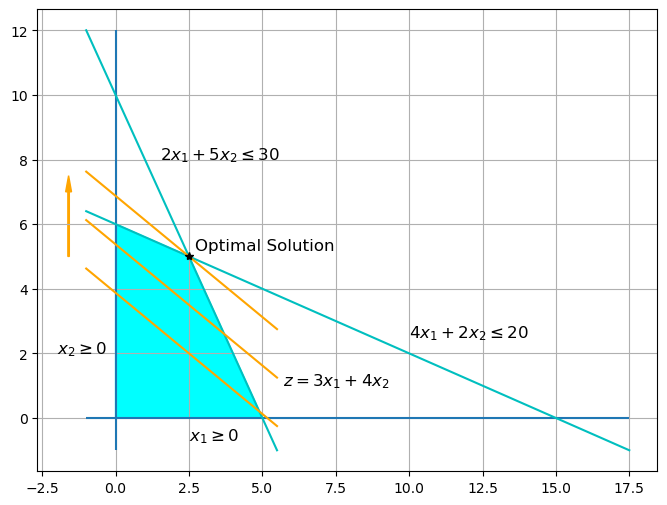

In [2]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)
ax.plot(np.linspace(-1, 17.5, 100), 6-0.4*np.linspace(-1, 17.5, 100), color="c")
ax.plot(np.linspace(-1, 5.5, 100), 10-2*np.linspace(-1, 5.5, 100), color="c")
ax.text(1.5, 8, "$2x_1 + 5x_2 \leq 30$", size=12)
ax.text(10, 2.5, "$4x_1 + 2x_2 \leq 20$", size=12)
ax.text(-2, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# Draw the feasible region
feasible_set = Polygon(np.array([[0, 0], 
                                 [0, 6], 
                                 [2.5, 5], 
                                 [5, 0]]), 
                       color="cyan")
ax.add_patch(feasible_set)

# Draw the objective function
ax.plot(np.linspace(-1, 5.5, 100), 3.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 5.375-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 6.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")
ax.text(5.7, 1, "$z = 3x_1 + 4x_2$", size=12)

# Draw the optimal solution
ax.plot(2.5, 5, "*", color="black")
ax.text(2.7, 5.2, "Optimal Solution", size=12)

plt.show()

The blue region is the feasible set within which all constraints are satisfied. 

Parallel orange lines are iso-revenue lines.

The firm's objective is to find the  parallel orange lines to the upper boundary of the feasible set. 

The intersection of the feasible set and the highest orange line delineates the optimal set. 

In this example, the optimal set is the point $(2.5, 5)$.

## Example 2: Investment Problem 

We now consider a problem posed and solved by  {cite}`hu_guo2018`.

A mutual fund has $ \$ 100,000$ to be invested over a three year horizon.

Three investment options are available:

1. **Annuity:**  the fund can  pay a same amount of new capital at the beginning of each of three years and receive a payoff of 130\% of **total capital** invested  at the end of the third year. Once the mutual fund decides to invest in this annuity, it has to keep investing in all subsequent  years in the three year horizon.

2. **Bank account:** the fund can deposit any amount  into a bank at the beginning of each year and receive its capital plus 6\% interest at the end of that year. In addition, the mutual fund is permitted to borrow no more than $20,000 at the beginning of each year and is asked to pay back the amount borrowed plus 6\% interest at the end of the year. The mutual fund can choose whether to deposit or borrow at the beginning of each year.

3. **Corporate bond:** At the beginning of the second year, a  corporate bond becomes available. 
The fund can buy an amount
that is no more than $ \$ $50,000 of this bond at the beginning of the second year and  at the end of the third year receive a payout of 130\% of the amount invested in the bond.

The mutual fund's objective is to maximize total payout that it owns at the end of the third year.

We can formulate this  as a linear programming problem.

Let  $x_1$ be the amount of put in the annuity, $x_2, x_3, x_4$ be  bank deposit balances at the beginning of the three years,  and $x_5$ be the amount invested  in the corporate bond. 

When $x_2, x_3, x_4$ are negative, it means that  the mutual fund has borrowed from  bank.

The table below shows the mutual fund's decision variables together with the timing protocol described above:

|                | Year 1 | Year 2 | Year 3 |
| :------------: | :----: | :----: | :----: |
|    Annuity     | $x_1$  | $x_1$  | $x_1$  |
|  Bank account  | $x_2$  | $x_3$  | $x_4$  |
| Corporate bond |   0    | $x_5$  |   0    |

The  mutual fund's decision making proceeds according to the following timing protocol:

1. At the beginning of the first year, the mutual fund decides how much to invest in the annuity and
   how much to deposit in the bank. This decision is subject to the constraint:  

   $$
   x_1 + x_2 = 100,000
   $$ 

2. At the beginning of the second year, the mutual fund has a bank balance  of $1.06 x_2$.
   It must keep $x_1$ in the annuity. It can choose to put $x_5$ into the corporate bond,
   and put $x_3$ in the bank. These decisions are restricted by 

   $$
   x_1 + x_5 = 1.06 x_2 - x_3
   $$

3. At the beginning of the third year, the mutual fund has a bank account balance equal
   to $1.06 x_3$. It must again invest  $x_1$ in the annuity,
   leaving it with  a bank account balance equal to $x_4$. This situation is summarized by the restriction:

   $$
   x_1 = 1.06 x_3 - x_4
   $$

The mutual fund's objective function, i.e., its wealth at the end of the third year is:

$$
1.30 \cdot 3x_1 + 1.06 x_4 + 1.30 x_5
$$

Thus, the mutual fund confronts the linear program:

$$
\begin{aligned}
\max_{x} \ & 1.30 \cdot 3x_1 + 1.06 x_4 + 1.30 x_5 \\
\mbox{subject to } \ & x_1 + x_2 = 100,000\\
 & x_1 - 1.06 x_2 + x_3 + x_5 = 0\\
 & x_1 - 1.06 x_3 + x_4 = 0\\
 & x_2 \ge -20,000\\
 & x_3 \ge -20,000\\
 & x_4 \ge -20,000\\
 & x_5 \le 50,000\\
 & x_j \ge 0, \quad j = 1,5\\
 & x_j \ \text{unrestricted}, \quad j = 2,3,4\\
\end{aligned}
$$

## Standard Form

For purposes of 

* unifying linear programs that are initially stated in superficially different forms, and

* having a form that is convenient to put into black-box software packages,
 
it is useful to devote some effort to describe a **standard form**.

Our standard form  is:

$$
\begin{aligned}
\min_{x} \ & c_1 x_1 + c_2 x_2 + \dots + c_n x_n  \\
\mbox{subject to } \ & a_{11} x_1 + a_{12} x_2 + \dots + a_{1n} x_n = b_1 \\
 & a_{21} x_1 + a_{22} x_2 + \dots + a_{2n} x_n = b_2 \\
 & \quad \vdots \\
 & a_{m1} x_1 + a_{m2} x_2 + \dots + a_{mn} x_n = b_m \\
 & x_1, x_2, \dots, x_n \ge 0 \\
\end{aligned}
$$

Let 

$$ 
A = \begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\ 
a_{21} & a_{22} & \dots & a_{2n} \\ 
  &   & \vdots &   \\ 
a_{m1} & a_{m2} & \dots & a_{mn} \\ 
\end{bmatrix}, \quad
b = \begin{bmatrix} b_1 \\ b_2 \\ \vdots \\ b_m \\ \end{bmatrix}, \quad
c = \begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_n \\ \end{bmatrix}, \quad
x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \\ \end{bmatrix}. \quad
$$

The standard form LP problem can be expressed concisely as:

$$
\begin{aligned}
\min_{x} \ & c'x \\
\mbox{subject to } \ & Ax = b\\
 & x >= 0\\
\end{aligned}
$$ (lpproblem)

Here, $Ax = b$ means that  the $i$-th entry of $Ax$  equals the $i$-th entry of $b$ for every $i$. 

Similarly, $x >= 0$ means that  $x_j$ is greater than $0$ for every $j$.

### Useful Transformations

It is useful to know how to transform a problem that initially is not stated in the standard form into one that is.

By deploying the following steps, any linear programming problem can be transformed into an  equivalent  standard form linear programming problem. 

1. **Objective Function:** If a problem is originally a constrained **maximization** problem, we can construct a new objective function that  is the additive inverse of the original objective function. The transformed problem is then a **minimization** problem.

2. **Decision Variables:** Given a variable $x_j$ satisfying $x_j \le 0$, we can introduce a new variable $x_j' = - x_j$ and subsitute it into original problem. Given a free variable $x_i$ with no restriction on its sign, we can introduce two new variables $x_j^+$ and $x_j^-$ satisfying $x_j^+, x_j^- \ge 0$ and replace $x_j$ by $x_j^+ - x_j^-$.

3. **Inequality constraints:** Given an inequality constraint $\sum_{j=1}^n a_{ij}x_j \le 0$, we can introduce a new variable $s_i$, called a **slack variable** that satisfies $s_i \ge 0$ and replace the original constraint by $\sum_{j=1}^n a_{ij}x_j + s_i = 0$.

Let's apply the above steps to the two examples described above.

### Example 1: Production Problem

The original problem is:

$$
\begin{aligned}
\max_{x_1,x_2} \ & 3 x_1 + 4 x_2 \\
\mbox{subject to } \ & 2 x_1 + 5 x_2 \le 30 \\
& 4 x_1 + 2 x_2 \le 20 \\
& x_1, x_2 \ge 0 \\
\end{aligned}
$$

This problem is equivalent to the following problem with a standard form:

$$
\begin{aligned}
\min_{x_1,x_2} \ & -(3 x_1 + 4 x_2) \\
\mbox{subject to } \ & 2 x_1 + 5 x_2 + s_1 = 30 \\
& 4 x_1 + 2 x_2 + s_2 = 20 \\
& x_1, x_2, s_1, s_2 \ge 0 \\
\end{aligned}
$$

### Example 2: Investment Problem

The original problem is:

$$
\begin{aligned}
\max_{x} \ & 1.30 \cdot 3x_1 + 1.06 x_4 + 1.30 x_5 \\
\mbox{subject to } \ & x_1 + x_2 = 100,000\\
 & x_1 - 1.06 x_2 + x_3 + x_5 = 0\\
 & x_1 - 1.06 x_3 + x_4 = 0\\
 & x_2 \ge -20,000\\
 & x_3 \ge -20,000\\
 & x_4 \ge -20,000\\
 & x_5 \le 50,000\\
 & x_j \ge 0, \quad j = 1,5\\
 & x_j \ \text{unrestricted}, \quad j = 2,3,4\\
\end{aligned}
$$

This problem is equivalent to the following problem with a standard form:

$$
\begin{aligned}
\min_{x} \ & -(1.30 \cdot 3x_1 + 1.06 x_4^+ - 1.06 x_4^- + 1.30 x_5) \\
\mbox{subject to } \ & x_1 + x_2^+ - x_2^- = 100,000\\
 & x_1 - 1.06 (x_2^+ - x_2^-) + x_3^+ - x_3^- + x_5 = 0\\
 & x_1 - 1.06 (x_3^+ - x_3^-) + x_4^+ - x_4^- = 0\\
 & x_2^- - x_2^+ + s_1 = 20,000\\
 & x_3^- - x_3^+ + s_2 = 20,000\\
 & x_4^- - x_4^+ + s_3 = 20,000\\
 & x_5 + s_4 = 50,000\\
 & x_j \ge 0, \quad j = 1,5\\
 & x_j^+, x_j^- \ge 0, \quad j = 2,3,4\\
 & s_j \ge 0, \quad j = 1,2,3,4\\
\end{aligned}
$$

## Computations

The package *scipy.optimize* provides a function ***linprog*** to solve linear programming problems with a form below:

$$
\begin{aligned}
\min_{x} \ & c' x  \\
\mbox{subject to } \ & A_{ub}x \le b_{ub} \\
 & A_{eq}x = b_{eq} \\
 & l \le x \le u \\
\end{aligned}
$$

```{note}
By default $l = 0$ and $u = \text{None}$ unless explicitly specified with the argument 'bounds'.
```

Let's apply this great Python tool to solve our two example problems.

### Example 1: Production Problem

The problem is:

$$
\begin{aligned}
\max_{x_1,x_2} \ & 3 x_1 + 4 x_2 \\
\mbox{subject to } \ & 2 x_1 + 5 x_2 \le 30 \\
& 4 x_1 + 2 x_2 \le 20 \\
& x_1, x_2 \ge 0 \\
\end{aligned}
$$

In [3]:
# Construct parameters
c_ex1 = np.array([3, 4])

# Inequality constraints
A_ex1 = np.array([[2, 5],
                  [4, 2]])
b_ex1 = np.array([30,20])

# Solve the problem
# we put a negative sign on the objective as linprog does minimization
res_ex1 = linprog(-c_ex1, A_ub=A_ex1, b_ub=b_ex1, method='revised simplex')

res_ex1

/tmp/ipykernel_7598/1851481465.py:11: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_ex1 = linprog(-c_ex1, A_ub=A_ex1, b_ub=b_ex1, method='revised simplex')


     con: array([], dtype=float64)
     fun: -27.5
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([2.5, 5. ])

The optimal plan tells the  factory to produce 2.5 units of Product 1 and 5 units of  Product 2; that  generates a maximizing value of  revenue of 27.5.

We are using the *linprog* function as a **black box**.  

Inside it, Python first  transforms the problem into  standard form. 

To do that, for each inequality constraint it generates one slack variable.

Here the vector of slack variables is a two-dimensional NumPy array that  equals $b_{ub} - A_{ub}x$. 

See the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog) for more details.

```{note}
This problem is to maximize the objective, so that we need to put a minus sign in front of parameter vector c.
```

### Example 2: Investment Problem

The problem is:

$$
\begin{aligned}
\max_{x} \ & 1.30 \cdot 3x_1 + 1.06 x_4 + 1.30 x_5 \\
\mbox{subject to } \ & x_1 + x_2 = 100,000\\
 & x_1 - 1.06 x_2 + x_3 + x_5 = 0\\
 & x_1 - 1.06 x_3 + x_4 = 0\\
 & x_2 \ge -20,000\\
 & x_3 \ge -20,000\\
 & x_4 \ge -20,000\\
 & x_5 \le 50,000\\
 & x_j \ge 0, \quad j = 1,5\\
 & x_j \ \text{unrestricted}, \quad j = 2,3,4\\
\end{aligned}
$$

Let's solve this problem using *linprog*.

In [4]:
# Construct parameters
rate = 1.06

# Objective function parameters
c_ex2 = np.array([1.30*3, 0, 0, 1.06, 1.30])

# Inequality constraints
A_ex2 = np.array([[1,  1,  0,  0,  0],
                  [1, -rate, 1, 0, 1],
                  [1, 0, -rate, 1, 0]])
b_ex2 = np.array([100000, 0, 0])

# Bounds on decision variables
bounds_ex2 = [(  0,    None),
              (-20000, None),
              (-20000, None),
              (-20000, None),
              (  0,   50000)]

# Solve the problem
res_ex2 = linprog(-c_ex2, A_eq=A_ex2, b_eq=b_ex2,
                  bounds=bounds_ex2, method='revised simplex')

res_ex2

/tmp/ipykernel_7598/1937289231.py:21: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_ex2 = linprog(-c_ex2, A_eq=A_ex2, b_eq=b_ex2,


     con: array([ 1.45519152e-11, -2.18278728e-11,  0.00000000e+00])
     fun: -141018.24349792692
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 24927.75474306,  75072.24525694,   4648.8252293 , -20000.        ,
        50000.        ])

Python tells us that  the best investment strategy is:

1. At the beginning of the first year, the mutual fund should buy $ \$24,927.75$ of the annuity. Its bank account balance should be $ \$75,072.25$.

2. At the beginning of the second year, the mutual fund should buy $ \$50,000 $ of the corporate bond and keep invest in the annuity. Its bank account balance should be $ \$ 4,648.83$.

3. At the beginning of the third year, the mutual fund should borrow $ \$20,000$ from the bank and invest in the annuity.

4. At the end of the third year, the mutual fund will get payouts from the annuity and corporate bond and repay its loan from the bank. At the end  it will own $ \$ $141018.24, so that it's total net  rate of return over the three periods is 41.02\%.

## Duality

Associated with a  linear programming of form {eq}`linprog` with $m$ constraints and $n$ decision variables,
there is an **dual** linear programming problem that takes the form (please see {cite}`bertsimas_tsitsiklis1997`)

$$
\begin{aligned}
\max_{p} \ & b' p \\
\mbox{subject to } \ & p_i \ge 0, & i \in M_1 \\
& p_i \le 0, & i \in M_2  \\
& p_i\ \text{unrestricted}, & i \in M_3  \\
& A_j' p \le c_j, & j \in N_1 \\
& A_j' p \ge c_j, & j \in N_2 \\
& A_j' p = c_j, & j \in N_3 \\
\end{aligned}
$$

Where $A_j$ is $j$-th column of the $m$ by $n$ matrix $A$.

```{note}
In what  follows, we shall  use $a_i'$ to denote the $i$-th row of $A$ and $A_j$ to denote the $j$-th column of $A$.
```

$$
A = \begin{bmatrix}
a_1' \\ 
a_2' \\ 
\ \\ 
a_m' \\ 
\end{bmatrix}.
$$

To construct the  dual of linear programming problem {eq}`linprog`, we proceed as follows:

1. For every constraint $a_i' x \ge(\le or =) b_i$, $j = 1,2,...,m$, in the primal problem, we construct a corresponding dual variable $p_i$. $p_i$ is restricted to be positive if $a_i' x \ge b_i$ or negative if $a_i' x \le b_i$ or unrestricted if $a_i' x = b_i$. We construct the $m$-dimensional vector   $p$ with entries $p_i$.

2. For every variable $x_j$, $j = 1,2,...,n$, we construct a corresponding dual constraint $A_j' p \ge(\le or =) c_j$. The constraint is $A_j' p \ge c_j$ if $x_j \le 0$, $A_j' p \le c_j$ if $x_j \ge 0$ or $A_j' p = c_j$ if $x_j $ is unrestricted.

3. The dual problem is to **maximize**  objective function $b'p$.

For a **maximization**  problem, we can first transform it to an equivalent minimization problem and then follow the above steps above to construct the  dual **minimization** problem. 

We can easily verify that  **the dual of a dual problem is the  primal problem**.

The following table summarizes relationships between objects in primal and dual problems. 

|  Objective: Min  |  Objective: Max  |
| :--------------: | :--------------: |
|  m constraints   |   m variables    |
| constraint $\ge$ | variable $\ge$ 0 |
| constraint $\le$ | variable $\le$ 0 |
|  constraint $=$  |  variable free   |
|   n variables    |  n constraints   |
| variable $\ge$ 0 | constraint $\le$ |
| variable $\le$ 0 | constraint $\ge$ |
|  variable free   |  constraint $=$  |

As an example, the dual problem of the standard form {eq}`lpproblem` is:

$$
\begin{aligned}
\max_{p} \ & b'p \\
\mbox{subject to } \ & A'p \le c\\
\end{aligned}
$$

As another example, consider a linear programming problem with form:

$$
\begin{aligned}
\max_{x} \ & c'x \\
\mbox{subject to } \ & A x \le b\\
& x \ge 0\\
\end{aligned}
$$ (linprog2)

Its dual problem is:

$$
\begin{aligned}
\min_{p} \ & b'p \\
\mbox{subject to } \ & A' p \ge c\\
& p \ge 0\\
\end{aligned}
$$

## Duality Theorems

Primal and dual problems are linked by powerful **duality theorems** that have  **weak** and **strong** forms.

The duality theorems provide the foundations of enlightening economic interpretations of linear programming problems. 

**Weak duality:** For linear programming problem {eq}`linprog`, if $x$ and $p$ are feasible solutions to the primal and the dual problems, respectively, then

$$ 
b'p \le c'x 
$$

**Strong duality:** For linear programming problem {eq}`linprog`, if the primal problem has an optimal solution $x$, then the dual problem also has an optimal solution. Denote an optimal solution of the dual problem as $p$. Then

$$ 
b'p = c'x 
$$

According to strong duality, we can find the optimal value for the primal problem by solving the dual problem.

But the dual problem tells us even more as we shall see next. 

### Complementary Slackness

Let $x$ and $p$ be feasible solutions to the primal problem {eq}`linprog` and its dual problem, respectively. 

Then $x$ and $p$ are also  optimal solutions of the primal and dual problems if and only if:

$$ 
p_i (a_i' x - b_i) = 0, \quad \forall i, \\
x_j (A_j' p - c_j) = 0, \quad \forall j.
$$

This means that $p_i = 0$ if $a_i' x - b_i \neq 0$ and $x_j = 0$ if $A_j' p - c_j \neq 0$.

These are the celebrated **complementary slackness** conditions. 

Let's interpret them.

### Interpretations 

Let's take a version of problem {eq}`linprog2` as a production problem and consider its associated dual problem.   

A factory produce $n$ products with $m$ types of resources.

Where  $i=1,2,\dots,m$ and $j=1,2,\dots,n$, let 

* $x_j$ denote quantities of product $j$ to be produced

* $a_{ij}$ denote required amount of resource $i$ to make one unit of product $j$,

* $b_i$ denotes the  avaliable amount of resource $i$

* $c_j$ denotes the revenue generated by producing one unit of product $j$. 


**Dual variables:** By  strong duality, we have

$$
c_1 x_1 + c_2 x_2 + \dots + c_n x_n = b_1 p_1 + b_2 p_2 + \dots + b_m p_m.
$$

Evidently, a one unit change of $b_i$ results in $p_i$ units  change of revenue. 

Thus, a dual variable can be interpreted as the **value** of one unit of resource $i$.

This is why it is often called the  **shadow price** of resource $i$. 

For feasible but not optimal primal and dual solutions $x$ and $p$, by weak duality, we have

$$
c_1 x_1 + c_2 x_2 + \dots + c_n x_n < b_1 p_1 + b_2 p_2 + \dots + b_m p_m.
$$

```{note}
Here, the expression is opposite to the statement above since primal problem is a minimization problem.
```

When a strict inequality holds, the solution is not optimal because  it doesn't fully utilize all valuable resources.

Evidently, 

* if a shadow price $p_i$ is larger than the market price for Resource $i$, the factory should buy more Resource $i$ and expand its scale to generate more revenue; 

* if a shadow price $p_i$ is less than the market price for Resource $i$, the factory should sell its  Resource $i$.

**Complementary slackness:** If there exists $i$ such that $a_i' x - b_i < 0$ for some $i$, then $p_i = 0$ by complementary slackness. $a_i' x - b_i < 0$ means that  to achieve its optimal production, the factory doesn't require as much  Resource $i$ as it has.
It is reasonable that the shadow price of Resource $i$ is  0:  some of its resource $i$ is redundant.

If there exists $j$ such that $A_j' p - c_j > 0$, then $x_j = 0$ by complementary slackness. $A_j' p - c_j > 0$ means that  the value of all resources used when producing one unit of product $j$ is greater than its cost.

This means that  producing another product that  can more efficiently utilize these resources is a better choice than producing product $j$

Since producing product $j$ is not optimal, $x_j$ should equal $0$.

### Example 1: Production Problem

This problem is one specific instance of the problem {eq}`linprog2`, whose economic meaning is interpreted above.

Its dual problem is:

$$
\begin{aligned}
\min_{x_1,x_2} \ & 30 p_1 + 20 p_2 \\
\mbox{subject to } \ & 2 p_1 + 4 p_2 \ge 3 \\
& 5 p_1 + 2 p_2 \ge 4 \\
& p_1, p_2 \ge 0 \\
\end{aligned}
$$

We solve this dual problem by using the  function *linprog*. 

Since parameters used here are defined before when solving the primal problem, we won't define them here.

In [5]:
# Solve the dual problem
res_ex1_dual = linprog(b_ex1, A_ub=-A_ex1.T, b_ub=-c_ex1, method='revised simplex')

res_ex1_dual

/tmp/ipykernel_7598/1704321462.py:2: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_ex1_dual = linprog(b_ex1, A_ub=-A_ex1.T, b_ub=-c_ex1, method='revised simplex')


     con: array([], dtype=float64)
     fun: 27.5
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([0.625 , 0.4375])

The optimal value for the dual problem equals  27.5.

This equals the optimal value of  the primal problem, an illustration of  strong duality. 

Shadow prices for materials and labor are 0.625 and 0.4375, respectively.

### Example 2: Investment Problem

The dual problem is:

$$
\begin{aligned}
\min_{p} \ & 100,000 p_1 - 20,000 p_4 - 20,000 p_5 - 20,000 p_6 + 50,000 p_7 \\
\mbox{subject to } \ & p_1 + p_2 + p_3 \ge 1.30 \cdot 3 \\
& p_1 - 1.06 p_2 + p_4 = 0 \\
& p_2 - 1.06 p_3 + p_5 = 0 \\
& p_3 + p_6 = 1.06 \\
& p_2 + p_7 \ge 1.30 \\
& p_i \ \text{unrestricted}, \quad i = 1,2,3 \\
& p_i \le 0, \quad i = 4,5,6 \\
& p_7 \ge 0 \\
\end{aligned}
$$

We solve this dual problem by using the function *linprog*.

In [6]:
# Objective function parameters
c_ex2_dual = np.array([100000, 0, 0, -20000, -20000, -20000, 50000])

# Equality constraints
A_eq_ex2_dual = np.array([[1, -1.06,     0,  1,  0,  0,  0],
                          [0,     1, -1.06,  0,  1,  0,  0],
                          [0,     0,     1,  0,  0,  1,  0]])
b_eq_ex2_dual = np.array([0, 0, 1.06])

# Inequality constraints
A_ub_ex2_dual = - np.array([[1, 1, 1, 0, 0, 0, 0],
                            [0, 1, 0, 0, 0, 0, 1]])
b_ub_ex2_dual = - np.array([1.30*3, 1.30])

# Bounds on decision variables
bounds_ex2_dual = [(None, None),
                   (None, None),
                   (None, None),
                   (None,    0),
                   (None,    0),
                   (None,    0),
                   (   0, None)]

# Solve the dual problem
res_ex2_dual = linprog(c_ex2_dual, A_eq=A_eq_ex2_dual, b_eq=b_eq_ex2_dual, 
                       A_ub=A_ub_ex2_dual, b_ub=b_ub_ex2_dual, bounds=bounds_ex2_dual,
                       method='revised simplex')

res_ex2_dual

/tmp/ipykernel_7598/410442426.py:25: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_ex2_dual = linprog(c_ex2_dual, A_eq=A_eq_ex2_dual, b_eq=b_eq_ex2_dual,


     con: array([-2.22044605e-16,  0.00000000e+00,  0.00000000e+00])
     fun: 141018.2434979269
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([ 1.37644176,  1.29852997,  1.22502827,  0.        ,  0.        ,
       -0.16502827,  0.00147003])

The optimal value for the dual problem is 141018.24, which equals the value of the primal problem.

Now, let's interpret the dual variables.

By strong duality and also our  numerical results, we have that  optimal value is:

$$
100,000 p_1 - 20,000 p_4 - 20,000 p_5 - 20,000 p_6 + 50,000 p_7.
$$

We know if $b_i$ changes one dollor, then the optimal payoff in the end of the third year will change $p_i$ dollars. 

For $i = 1$, this means if the initial capital changes by one dollar, then the optimal payoff in the end of the third year will change $p_1$ dollars. 

Thus, $p_1$ is the potential value of one more unit of initial capital, or the shadow price for initial capital.

We can also interpret $p_1$ as the prospective  value in the end of the third year coming from having  one more  dollar to invest at the beginning of the first year.

If the mutual fund can raise money at a cost lower than $p_1 - 1$, then it should raise more money to increase its revenue.

But if it bears a cost of funds higher than $p_1 - 1$, the mutual fund shouldn't do that. 

For $i = 4, 5, 6$, this means that if the amount of capital that the fund is permitted to borrow from the bank changes by one dollar, the optimal pay out  at the end of the third year will change $p_i$ dollars.

Thus, for $i = 4, 5, 6$, $|p_i|$ indicates the value of one dollar that the mutual fund can borrow from the bank at the beginning of the $i-3$-th year. 

$|p_i|$ is the shadow price for the loan amount. (We use absolute value here since $p_i \le 0$.)

If the interest rate is lower than $|p_i|$, then the mutual fund should borrow to increase its optimal payoff;  if the interest rate is higher, it is better to not do this.

For $i = 7$, this means that if the amount of the corporate bond the mutual fund can buy changes one dollar, then the optimal payoff will change $p_7$ dollars at the end of the third year.  Again, $p_7$ is the shadow price for the amount of the corporate bond the mutual fund can buy.

As for numerical results 

1. $p_1 = 1.38$, which means one dollar of initial capital is worth $\$ 1.38$ at the end of the third year.

2. $p_4 = p_5 = 0$, which means the loan amounts at the beginning of the first and second year are worth nothing. Recall that the optimal solution to the primal problem, $x_2, x_3 > 0$, which means at the beginning of the first and second year, the mutual fund has a postive bank account and borrows no capital from the bank. Thus, it is reasonable that the loan amounts at the beginning of the first and second year are valueless. This is what the  complementary slackness conditions mean in this setting.

3. $p_6 = -0.16$, which means one dollar of the loan amount at the beginning of the third year is worth $\$ 0.16$. Since $|p_6|$ is higher than the interest rate 6\%, the mutual fund should borrow as much as possible at the beginning of the third year. Recall that  the optimal solution to the primal problem is  $x_4 = -20,000$ which means the mutual fund borrows money from the bank as much as it can.

4. $p_7 = 0.0015$, which means one dollar of the amount of the corporate bond that the mutual fund can buy is worth $\$ 0.0015$.